# AUTOMATIC ROCK CLASSIFICATION
### Misael M. Morales, Oriyomi Raheem, Carlos Torres-Verdin, and Michael Pyrcz, UT-Austin; Murray Christie, Vladimir Rabinovich, S&P Global
#### 2024, Digital Reservoir Characterization Technology (DiReCT)
***

In [ ]:
from auto_rock_classification import *
check_tf_gpu()
check_torch_gpu()

In [1]:
arc = RockClassification()
arc.__dict__

{'show_id': False,
 'folder': 'Data',
 'subfolder': 'UT Export core classification',
 'file': 'GULFCOAST & TX CORE.csv',
 'outfile': 'GULFCOAST & TX CORE postprocess.csv',
 'minpts': 30,
 'random_state': 2024,
 'well_number': 0,
 'prop': 'PORO',
 'n_classes': None,
 'method': None,
 'birch_threshold': 0.1,
 'cutoffs': None,
 'kexp': 0.588,
 'texp': 0.732,
 'pexp': 0.864,
 'phimin': None,
 'phimax': None,
 'kmin': None,
 'kmax': None,
 's1': 10,
 'sw': 80,
 's2': 50,
 'ms': 30,
 'alpha': 0.25,
 'alphag': 0.33,
 'cmap0': 'plasma',
 'cmap': 'jet',
 'figsize': (15, 9),
 'showfig': True,
 'savefig': True,
 'return_data': False,
 'verbose': True,
 'plate': <Projected CRS: +proj=eqc +ellps=WGS84 +a=6378137.0 +lon_0=0.0 +to ...>
 Name: unknown
 Axis Info [cartesian]:
 - E[east]: Easting (unknown)
 - N[north]: Northing (unknown)
 - h[up]: Ellipsoidal height (metre)
 Area of Use:
 - undefined
 Coordinate Operation:
 - name: unknown
 - method: Equidistant Cylindrical
 Datum: Unknown based on WGS 

In [4]:
arc.load_data()

All data shape: (102797, 88)


In [2]:
# RUN PROCESSING
# this module will load the Core data for all wells, and do:
# (1) filter the wells based on the minimum number of core points specified
# (2) apply a clustering technique to estimate the rock classes along the well
# (3) save the results of the predicted classes in a csv file for all wells
RockClassification(minpts=30, method='gmm', n_classes=3).run_processing()

All data shape: (102797, 88)
Total number of wells: 1379
--------------------------------------------------------------------------------
                    Processing Core2Log Rock Classification
--------------------------------------------------------------------------------
Method: GMM | Number of Classes: 3 | Cutoffs: None
--------------------------------------------------------------------------------


Processing well(s): 100%|██████████| 1379/1379 [00:22<00:00, 60.98 well/s]


--------------------------------------------------------------------------------
Processing Done!
Saving (Data/GULFCOAST & TX CORE postprocess.csv) ...
Elapsed time: 25.499 seconds
--------------------------------------------------------------------------------


All data shape: (102797, 88)
Total number of wells: 1379
--------------------------------------------------------------------------------
                Automatic Core2Log Rock Classification Dashboard
--------------------------------------------------------------------------------
Method: BIRCH | Number of Classes: 3 | Cutoffs: None
Well shape: (223, 5)
--------------------------------------------------------------------------------


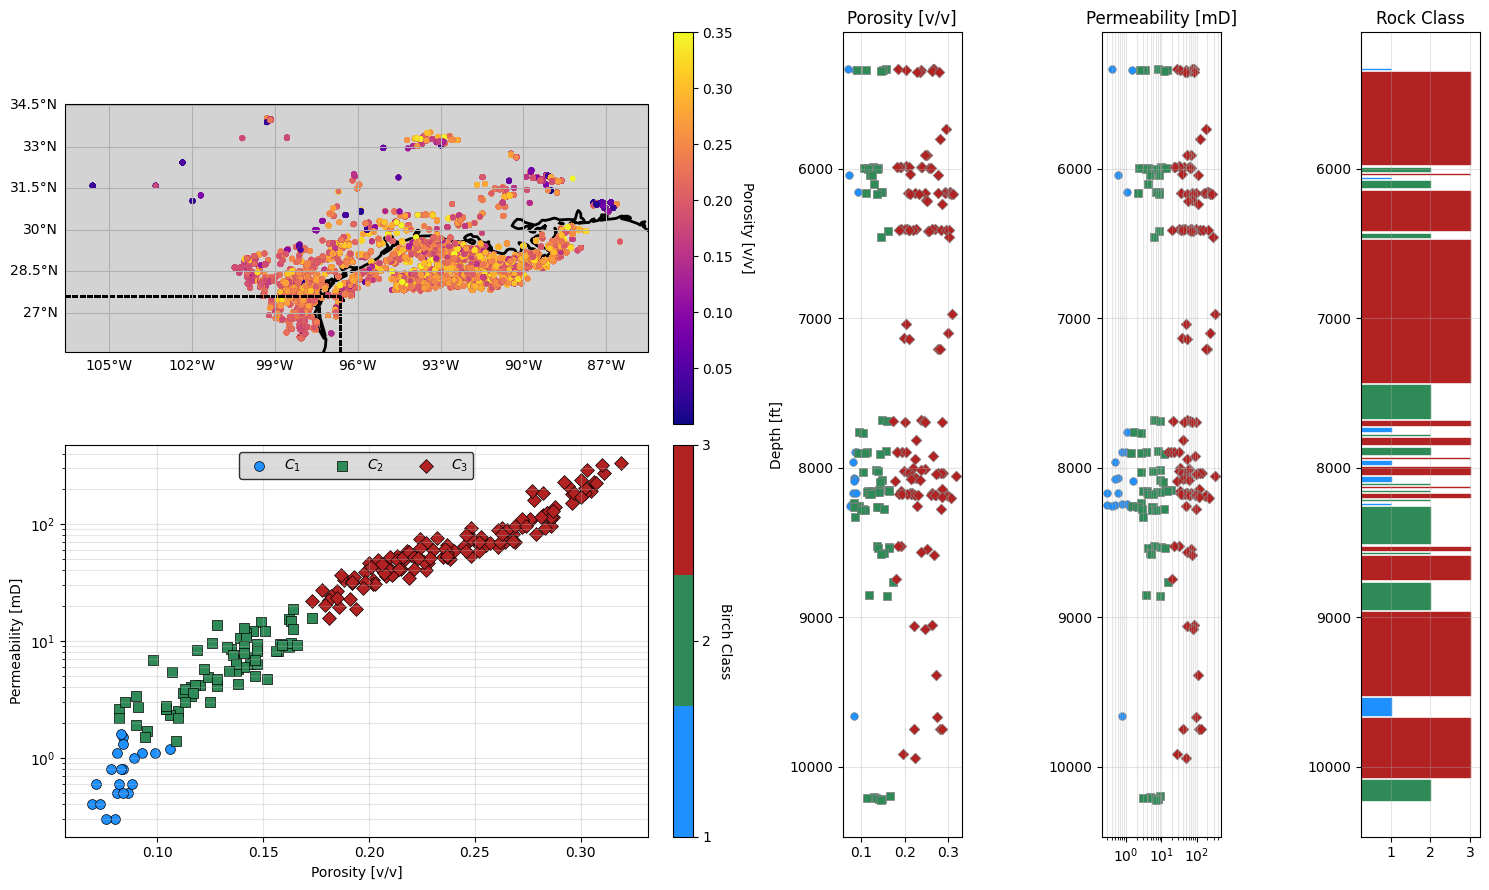

Elapsed time: 6.963 seconds
--------------------------------------------------------------------------------


In [3]:
# RUN DASHBOARD
# this module will load the Core2Log Rock Classification dashboard:
# (1) specify the well to analyze
# (2) specify the rock classification technique to use
#   (2a) if the technique is physics-based: specify cutoffs
#   (2b) if the technique is ML-based: specify the number of classes
# (3) run the dashboard to visualize results
RockClassification(minpts=30, well_number=1104, method='birch', n_classes=3).run_dashboard()

--------------------------------------------------------------------------------
                       Compare Rock Classification Methods
--------------------------------------------------------------------------------
Number of Classes: 3
Leverett Cutoffs: [10, 20, 40]
Winland Cutoffs: [150, 300, 500]
Lorenz Cutoffs: [0.5, 2, 5]
--------------------------------------------------------------------------------
All data shape: (102797, 88)
Total number of wells: 1379
Well shape: (223, 4)
--------------------------------------------------------------------------------


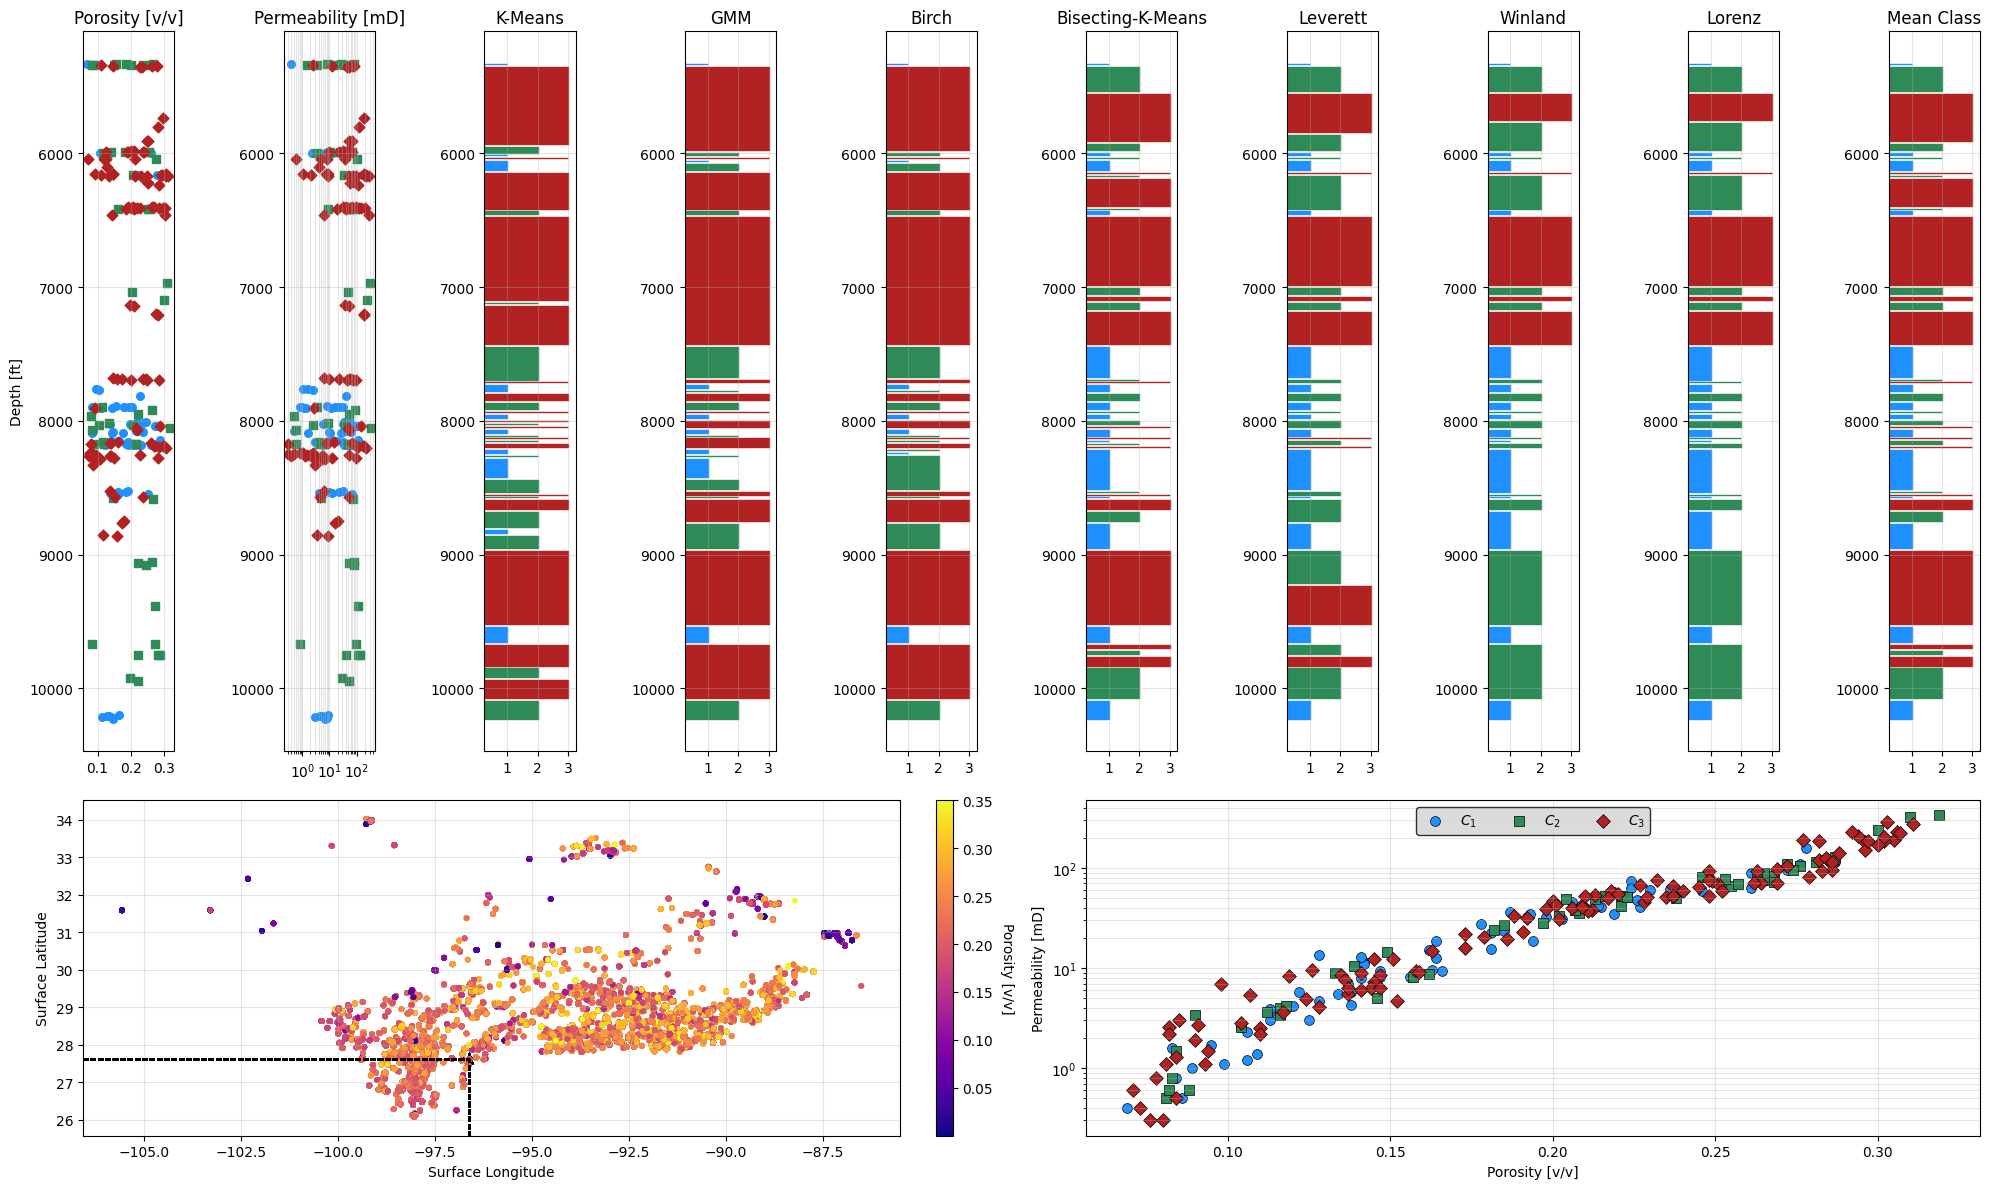

Elapsed time: 8.135 seconds
--------------------------------------------------------------------------------


In [4]:
# COMPARISON
# compare all techniques for a given well (user must define cutoffs and n_classes accordingly)
RockClassification(minpts=30, well_number=1104).run_comparison(n_classes=3, 
                                                    leverett_cutoffs=[10,20,40], 
                                                    winland_cutoffs=[150,300,500], 
                                                    lorenz_cutoffs=[0.5,2,5])

All data shape: (102797, 88)
Total number of wells: 1379
--------------------------------------------------------------------------------
                Automatic Core2Log Rock Classification Dashboard
--------------------------------------------------------------------------------
Method: KMEANS | Number of Classes: 3 | Cutoffs: None
Well shape: (39, 5)
--------------------------------------------------------------------------------


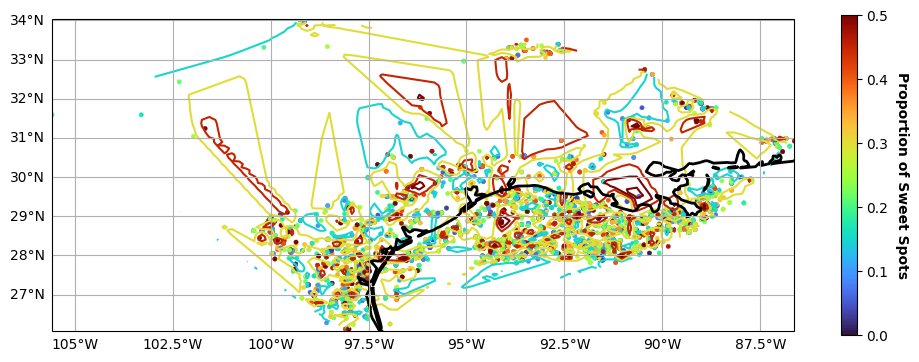

Elapsed time: 15.354 seconds
--------------------------------------------------------------------------------


In [5]:
# SPATIAL DISTRIBUTION
# visualize the spatial distribution of sweet spots
RockClassification().run_spatial_map()

***
# END